# TITANIC_PROBLEM

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#Read Csv file
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_valid=pd.read_csv("gender.csv")

# Data_Engineering

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#to check if there is null value in column
for i in df_train.columns:
  print(i,"\t-\t", df_train[i].isna().mean())

PassengerId 	-	 0.0
Survived 	-	 0.0
Pclass 	-	 0.0
Name 	-	 0.0
Sex 	-	 0.0
Age 	-	 0.19865319865319866
SibSp 	-	 0.0
Parch 	-	 0.0
Ticket 	-	 0.0
Fare 	-	 0.0
Cabin 	-	 0.7710437710437711
Embarked 	-	 0.002244668911335578


In [5]:
df_train=df_train.drop(["Cabin"], axis=1)

In [7]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode(), inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
df_train=df_train.drop(["PassengerId","Fare","Ticket","Name"], axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder

cat_col= df_train.drop(df_train.select_dtypes(exclude=['object']), axis=1).columns
print(cat_col)

enc1 = LabelEncoder()
df_train[cat_col[0]] = enc1.fit_transform(df_train[cat_col[0]].astype('str'))

enc2 = LabelEncoder()
df_train[cat_col[1]] = enc2.fit_transform(df_train[cat_col[1]].astype('str'))

Index(['Sex', 'Embarked'], dtype='object')


In [11]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


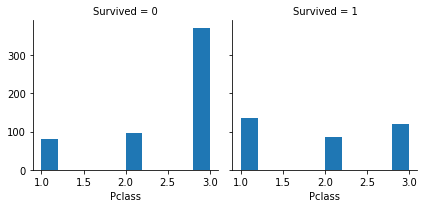

In [14]:
sn.FacetGrid(df_train, col="Survived").map(plt.hist, "Pclass") #to check co relation between survived and Pclass

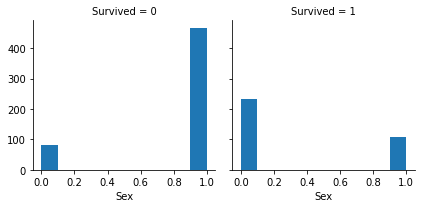

In [15]:
sn.FacetGrid(df_train, col="Survived").map(plt.hist, "Sex")#to check co relation between survived and Sex

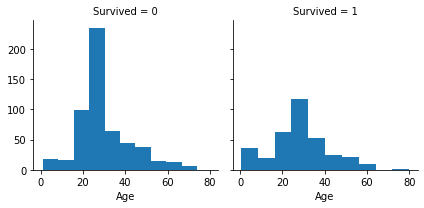

In [16]:
sn.FacetGrid(df_train, col="Survived").map(plt.hist, "Age")#to check co relation between survived and Age

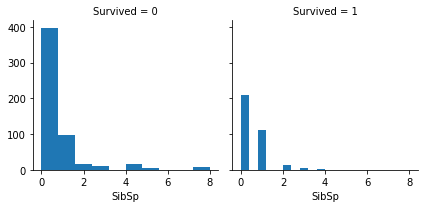

In [17]:
sn.FacetGrid(df_train, col="Survived").map(plt.hist, "SibSp")#to check co relation between survived and SibSp

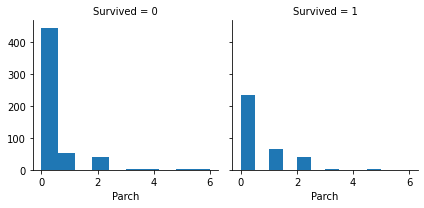

In [18]:
sn.FacetGrid(df_train, col="Survived").map(plt.hist, "Parch")#to check co relation between survived and Parch

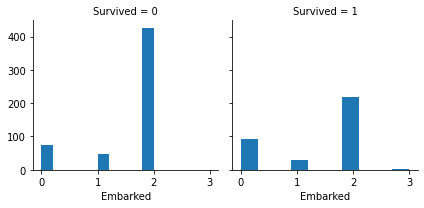

In [19]:
sn.FacetGrid(df_train, col="Survived").map(plt.hist, "Embarked")#to check co relation between survived and Embarked

In [21]:
corr=df_train.corr
corr

<bound method DataFrame.corr of      Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0           0       3    1  22.0      1      0         2
1           1       1    0  38.0      1      0         0
2           1       3    0  26.0      0      0         2
3           1       1    0  35.0      1      0         2
4           0       3    1  35.0      0      0         2
..        ...     ...  ...   ...    ...    ...       ...
886         0       2    1  27.0      0      0         2
887         1       1    0  19.0      0      0         2
888         0       3    0  28.0      1      2         2
889         1       1    1  26.0      0      0         0
890         0       3    1  32.0      0      0         1

[891 rows x 7 columns]>

In [24]:
x=df_train.drop(["Survived"],axis=1) #Dependent varibale
y=df_train["Survived"]  #independent varibale

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [40]:
yp=model.predict(x_test)

In [41]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted':yp})
pred_df.head()

,Actual,Predicted
652,0,0
464,0,0
19,1,1
380,1,1
457,1,1


In [38]:
model.score(x_train,y_train)

0.7913322632423756

In [44]:
cm=confusion_matrix(y_test,yp)
cm

array([[148,  10],
       [ 33,  77]])

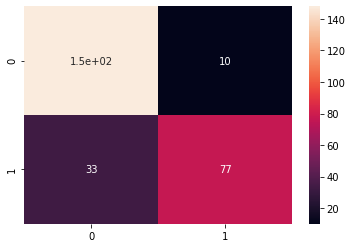

In [45]:
sn.heatmap(cm, annot=True)

In [46]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
df_test = df_test.drop(["Cabin"], axis=1)

df_test['Age'].fillna(df_test['Age'].median(), inplace=True) #filling Nan values of Age
df_test['Embarked'].fillna(df_test['Embarked'].mode(), inplace=True)

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [49]:
PassengerId = df_test["PassengerId"]

df_test = df_test.drop(["PassengerId", "Fare", "Ticket", "Name"], axis = 1)   

In [51]:
df_test[cat_col[0]] = enc1.transform(df_test[cat_col[0]].astype('str'))

df_test[cat_col[1]] = enc2.transform(df_test[cat_col[1]].astype('str'))

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [54]:
df_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [55]:
yp1=model.predict(df_test)

In [56]:
yp1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Text(0.5, 0, 'Passenger')

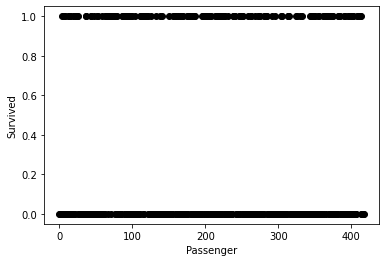

In [62]:
plt.scatter([i for i in range(len(df_test["Age"]))], yp1, color='black')

plt.ylabel('Survived')
plt.xlabel('Passenger')

In [63]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": yp1
    })

submission.to_csv('./submit.csv', index=False)